## Respuesta dinámica a excitaciones generales con amortiguación
### Cálculo directo de la integral de Duhamel
#### Fuerza Cuadrática


#### Problema
La torre de la figura está sometida a una aceleración horizontal en su cimiento $a(t)$. Determine el desplazamiento de la parte superior de la torre con relación al cimiento en el instante $t=1.0 s$. Suponer la amortiguación igual al $20\%$ de la mortiguación crítica.

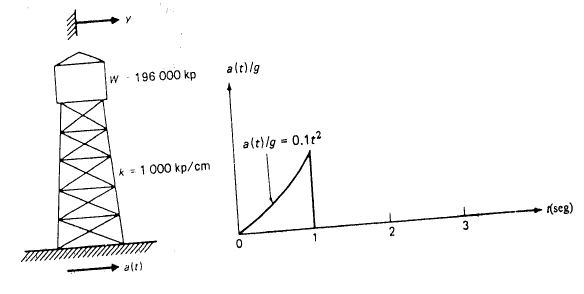

In [2]:
from IPython.display import Image
Image(filename="imagenes/fig_4.png")

In [3]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from librerias.integral import cuad_gauss # librería que aproxima las integrales mediante el método de Cuadratura de Gauss

In [14]:
# Iniciamos las variables
P = 196000 # Peso W en kp
g = 980 # Gravedad en cm/s2
m = P/g  # masa en kp*s2/cm
k = 1000  # rigidez en kp/cm
e = 0.2 # razón de amortiguación del sistema

F = lambda t: - m * g * 0.1 * t**2 	# Fuerza con aceleración constante aplicada al cimiento
tf = 1 # tienpo hasta que se aplica la fuerza
dt = 0.05 # intervalos de tiempo

Cálculos:

In [15]:
w = (k/m)**0.5  # Frecuencia angular natural(rad/s)
wd = w*(1 - e**2)**0.5 # Frecuencia del sistema con amortiguación

Utilizaremos las siguientes ecuaciones:
$$ A_D(t_i)=A_D(t_{i-1}) + \int^{t_i}_{t_{i-1}} F(\tau) e^{\xi \omega \tau}cos(\omega_{D}\tau) d\tau$$
$$ B_D(t_i)=B_D(t_{i-1}) + \int^{t_i}_{t_{i-1}} F(\tau) e^{\xi \omega \tau}sen(\omega_{D}\tau) d\tau$$


$$ y(t_i) = \frac{e^{\xi \omega t_i}}{m \omega_D}(A_D(t_i)sen(\omega_D t_i)-B_D(t_i)cos(\omega_D t_i) )$$

In [16]:
# Variables iniciales necesarias
y0 = 0 # desplazamiento inicial
v0 = 0 # velocidad inicial
a0 = 0 # acelereación inicial
A = 0
B = 0
AA = [A]
BB = [B]
y = [y0]
v = [v0]
a = [a0]
n = int(tf / dt) 
tt = np.arange(0, tf + dt, dt) # vector con los intervalos de tiempo

In [17]:
# definimos las ecuaciones dentro de las integrales
eqA = lambda t: F(t) * np.exp(e * w * t) * np.cos(wd * t)
eqB = lambda t: F(t) * np.exp(e * w * t) * np.sin(wd * t)

In [18]:
# definimos las función y(t) = f y derivadas
f = lambda t: (A*np.sin(wd * t) - B * np.cos(wd * t)) * np.exp(-e * w * t) / (m * wd)
h = 0.000001
df = lambda t: (f(t + h) - f(t))/h # primera derivada
ddf = lambda t: (df(t + h) - df(t))/h # segunda derivada

In [19]:
# iteramos
for i in range(n):
    A = A + cuad_gauss(tt[i], tt[i + 1], eqA)
    B = B + cuad_gauss(tt[i], tt[i + 1], eqB)
    
    AA.append(A)
    BB.append(B)
    y.append(f(tt[i + 1]))
    v.append(df(tt[i + 1]))
    a.append(ddf(tt[i + 1]))

In [20]:
df = pd.DataFrame({'t(s)':tt,'A':AA,'B':BB,'y':y,'v':v,'a':a})
df


,t(s),A,B,y,v,a
0,0.00,0.00000,0.00000,0.000000,0.000000,0.000000
1,0.05,-0.82749,-0.06822,-0.000051,-0.004036,0.003862
2,0.10,-6.65906,-1.10673,-0.000801,-0.031870,0.032509
3,0.15,-22.43903,-5.66595,-0.004011,-0.106057,0.114914
4,0.20,-52.69468,-18.05983,-0.012530,-0.247600,0.284103
5,0.25,-101.13193,-44.34495,-0.030216,-0.475759,0.576615
6,0.30,-170.22248,-92.22426,-0.061840,-0.807895,1.031848
7,0.35,-260.79489,-170.87199,-0.112995,-1.259340,1.691480
8,0.40,-371.64267,-290.67826,-0.189984,-1.843297,2.598727
9,0.45,-499.16321,-462.91382,-0.299718,-2.570776,3.797795


In [34]:
print("Desplazamiento t = 1s: {}".format(round((df['y'][len(df['y'])-1]),4)))

Desplazamiento t = 1s: -5.9201
